# 建立具分歧及合併結構的神經網路模型

建立一個元素及架構如下的神經網路模型:

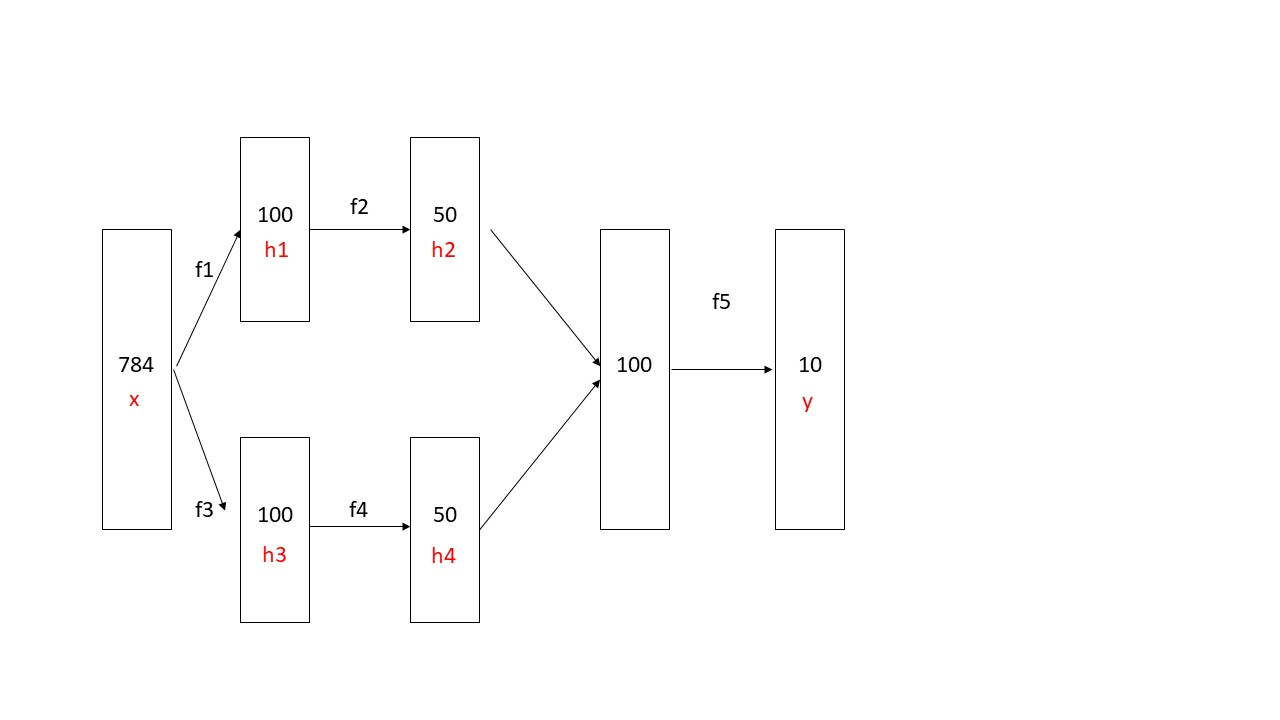

x: 代表的是輸入模型的圖片向量，為 784 維的向量。
h1: x 經過 f1 隱藏層運算後得結果，即為 f1(x)，為 100 維的向量。
h2: h1 經過 f2 隱藏層運算後得結果，即為 f2(h1)，為 50 維的向量。
h3: x 經過 f3 隱藏層運算後得結果，即為 f3(x)，為 100 維的向量。
h4: h3 經過 f4 隱藏層運算後得結果，即為 f4(h3)，為 50 維的向量。

y: h2 和 h4 經過f5 運算後得結果，即為 f5(h1,h4)，為 10 維的向量，代表的是 x 為哪個數字的機率。

In [3]:

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from keras.datasets import mnist

from keras.utils import np_utils

In [12]:
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

定義函數

In [13]:
f_1 = Dense(100, activation='sigmoid')
f_2 = Dense(50, activation='sigmoid')
f_3 = Dense(100, activation='sigmoid')
f_4 = Dense(50, activation='sigmoid')
f_5 = Dense(10, activation='softmax')

In [5]:
x = Input(shape=(784,))

輸入訓練資料

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [9]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

定義變數

In [14]:
h_1 = f_1(x)
h_2 = f_2(h_1)
h_3 = f_3(x)
h_4 = f_4(h_3)
u = concatenate([h_4, h_2])
y = f_5(u)

In [15]:
print(u)
print(y)

Tensor("concatenate_1/concat:0", shape=(?, 100), dtype=float32)
Tensor("dense_10/Softmax:0", shape=(?, 10), dtype=float32)


最終建立模型基本的架構

In [16]:
model_Com = Model(x, y)
model_Com.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 100)          78500       input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 100)          78500       input_1[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 50)           5050        dense_8[0][0]                    
__________________________________________________________________________________________________
dense_7 (D

In [18]:
model_Com.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

讓模型依據以上架構以及變數去訓練

In [20]:
model_Com.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0464 - acc: 0.7602
Epoch 2/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0400 - acc: 0.7898
Epoch 3/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0346 - acc: 0.8131
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0302 - acc: 0.8452
Epoch 5/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0266 - acc: 0.8711
Epoch 6/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0237 - acc: 0.8839
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0215 - acc: 0.8927
Epoch 8/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0197 - acc: 0.8986
Epoch 9/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0184 - acc: 0.9017
Epoch 10/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0172 - acc: 0.9071

最後映出測試結果

In [21]:
score_Com = model_Com.evaluate(x_test, y_test, batch_size=1000)
print("Loss: %f" %score_Com[0])
print("準確率: %f" %(score_Com[1]*100))

10000/10000 [==============================] - 0s 32us/step
Loss: 0.012216
準確率: 92.730000
